# Шаг 1. Цели исследования и ознакомление с датасетом

## 1.1. Знакомство с данными

**Примерный план:**
- описать цель исследования и ожидаемый результат
- добавить легенду (описание данных)
- изучить каждый датасет
- определить проблемы с данными (пропуски, ошибочные значения, неверные типы данных)

**Наименование исследования: "Прогнозирование востребованности игровых платформ и их продуктов для интернет-магазина "Стримчик" в 2017 году**

- **Цель исследования:** с помощью имеющихся данных предоставить рекомендацию интернет-магазину "Стримчик", на какие продукты индустрии игр следует обратить внимание в 2017 году (какие платформы будут востребованы и какие жанры наиболее нравятся геймерам).

- **Задачи исследования:** изучить "историю" развития индустрии игровых продуктов, затем выявить наиболее актуальный временной интервал для прогноза. Также, в ходе исследования необходимо установить, как долго платформы (и продукты к ним, соответственно) востребованы на рынке, способны ли оценки влиять на экономический "выхлоп" игр, понять, какие жанры нравятся геймерам и составить "портреты" потребителя по 4-м крупным сегментам рынка.

**Аннотация:** исследование будет произведено на основании данных открытого датасета, в котором описаны продажи игр на различных платформах с 1980 года.

**Ожидаемый результат исследования:** предоставление обоснованной рекомендации интернет-магазину "Стримчик", сделаной на основании выявленных зависимостей, наблюдений и проверки гипотез

**Описание данных:**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.isna().sum().sort_values(ascending = False) # проверим, какое количество пропусков имеется

Critic_Score       8578
Rating             6766
User_Score         6701
Year_of_Release     269
Name                  2
Genre                 2
Platform              0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
dtype: int64

In [5]:
data.duplicated().sum() #проверим наличие явных дубликатов

0

## 1.2. Вывод

- наименования всех столбцов начинаются с заглавной буквы, что считается "дурным тоном"
- некорректный тип данных в столбце Year_of_Release, нет необходимости в дробной части, целесообразнее перевести в int
- User_Score лучше перевести во float, как правило, оценки содержат 2 знака после запятой
- имеется большое количество пропусков (выведены чуть выше) 

# Шаг 2. Предобработка данных

## 2.1. Работа по улучшению качества данных

**Примерный план выполнения шага:**
- Перевести наименование всех столбцов к "змеиному регистру"
- Исправить тип данных, согласно выводам из первого шага
- Посмотреть процент пропусков в тех столбцах, где они есть
- Удалить пропуски, которые не исказят суть исследования
- Осуществить замену пропусков там, где это возможно и не будет заведомо недостоверным значением
- Посчитать суммарное количество проданных игр по всем рассматриваемым сегментам рынка

**Приведем столбцы к нижнему регистру:**

In [6]:
data.columns = data.columns.str.lower()
display(data.columns.tolist())

['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating']

**Посмотрим количество пропущенных значений:**

In [7]:
print('Процент пропущенных значений в столбце critic_score:', (data['critic_score'].isna().sum()/len(data['critic_score']) * 100).round(1))
print()
print('Процент пропущенных значений в столбце rating:', (data['rating'].isna().sum()/len(data['rating']) * 100).round(1))
print()
print('Процент пропущенных значений в столбце rating:', (data['user_score'].isna().sum()/len(data['user_score']) * 100).round(1))
print()
print('Процент пропущенных значений в столбце year_of_release:', (data['year_of_release'].isna().sum()/len(data['year_of_release']) * 100).round(1))

Процент пропущенных значений в столбце critic_score: 51.3

Процент пропущенных значений в столбце rating: 40.5

Процент пропущенных значений в столбце rating: 40.1

Процент пропущенных значений в столбце year_of_release: 1.6


Процент пропущенных значений в столбце year_of_release позволяет нам пренебречь этими значениями, тем более, что найти год выхода мы можем разве что в интернете, не получится заменить его с помощью значений других столбцов. Среднее/медиана тут тоже не помогут.

In [8]:
data.dropna(subset = ['year_of_release'],inplace = True)
data['year_of_release'] = data['year_of_release'].astype('int')

В расчете процента пропущенных значений я не выводил пропуски в жанре и имени, очевидно, что процент крайне мал. Посмотрим, что за строки содержат в себе пропуск с помощью query.

In [9]:
display(data.query('name.isna()'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Удивительно, но в этих же самых строках оказался и пропуск в genre. Обе строки не повлияют на общую картину, а пропусков тут больше, чем полезной информации. Стоит и от них избавиться.

In [10]:
data.dropna(subset = ['name'],inplace = True)

В столбце с пользовательской оценкой приличное количество значений tbd. Поиск по интернету приводит к следующему сокращению этой аббревиатуры: To Be Determined, то есть "Будет определено". Видимо, было опрошено слишком малое количество геймеров для формирования корректной оценки. В данном случае, это сокращение = пропуску, т.к. мы не можем с ним работать. Поэтому, с помощью to_numeric, переведем тип в числовой, а tbd станет пропуском.

In [11]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data['user_score'] = data['user_score'].astype('float64')

С пропусками в оценках (что геймеров, что критиков) ситуация более сложная, т.к. их нельзя заменить медианным значением по жанру, году выхода, и.т.п. Суть рейтинга в том, что это индивидуальный показатель. Игра могла как выстрелить, так и провалиться, любое усреднение не даст корректной оценки по каждой игре. Что касается рейтинга - явно имеем дело с расчетной характеристикой - где был пропущен хотя бы один показатель оценки (геймера или критика) - имеем пропуск. Заменим его на unk (unknown), чтобы улучшить восприятие датасета.

In [12]:
data['rating'] = data['rating'].fillna('unk')

## 2.2. Расчет суммарной прибыли

**Рассчитаем суммарную прибыль для каждой игры, путем сложения каждого сегмента потребителей друг с другом.**

In [13]:
data['sum_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
display(data.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unk,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unk,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unk,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unk,28.31


## 2.3. Вывод

В данных, помимо не самых "порядочных" решений, вроде наименования столбцов с большой буквы есть масса пропусков, заменить которые каким-либо шаблонным решением не представляется возможным. Есть риск как "повысить" рейтинг плохой игре, так и в обратную сторону. На прошлых этапах работы с данными были допущены ошибки в типах данных, которые не позволяли с ними корректно работать (например, целочисленный формат столбца с рейтингом, который всегда указывается в сотых, т.е. 2 знака после запятой.
Причиной пропусков видятся как человеческий фактор, так и технологические ошибки, в равной степени. В идеале, будь такая возможность, стоило бы пообщаться с теми, кто формировал датасет и понять, как можно получить его более корректную версию.

# Шаг 3. Исследовательский анализ данных

**Примерный план выполнения шага:**
- Посмотреть количество игр, выпускаемых в разные годы
- Определить, какие платформы более востребованы за имеющийся интервал времени
- Определить "топ" платформ, продукция для которых наиболее часто приобреталась
- Установить "цикл жизни" для платформ, которые "заходят" на рынок игровой индустрии
- Выбрать временной интервал для дальнейшего построения прогноза
- Предположить, какие платформы будут наиболее актуальны в 2017 году
- Проверить предположение, что отзывы (как критиков, так и геймеров) влияют на количество проданных игр
- Установить самые популярные жанры игр

### 3.1. **Определим, какое количество игр выпускалось в разные годы:**

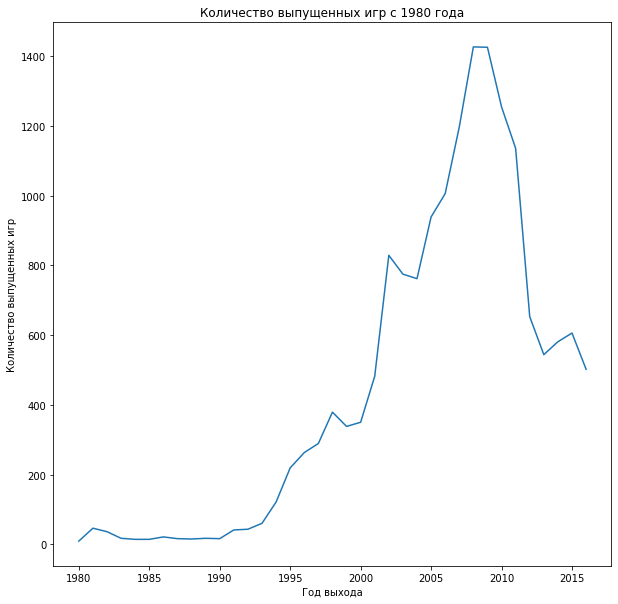

In [14]:
data.groupby('year_of_release')['name'].count().plot(figsize=(10, 10), title='Количество выпущенных игр c 1980 года');
plt.xlabel('Год выхода');
plt.ylabel('Количество выпущенных игр');

График позволяет сделать вывод, что количество игр (ежегодное) стало регулярно расти с 1995 года, а пик был в 2008-2009 годах. Также, выведем соотношение в цифрах, чтобы убедиться в верности предположения

In [15]:
data.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

Учтем эту информацию, для выполнения следующих шагов исследования

### 3.2. **Изучим зависимость количества продаж от платформы, на которых были реализованы игры**

In [16]:
platform_sales = data.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending = False)

Посмотрим на гистограмму.

In [17]:
#data.pivot_table(index='platform', values='sum_sales', aggfunc='sum').plot(kind='bar', grid=True, figsize=(15, 10), title='Сумма продаж по платформам')
#;
#plt.xlabel('Платформа');
#plt.ylabel('Прибыль');

In [18]:
#aaa = data.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending = False)

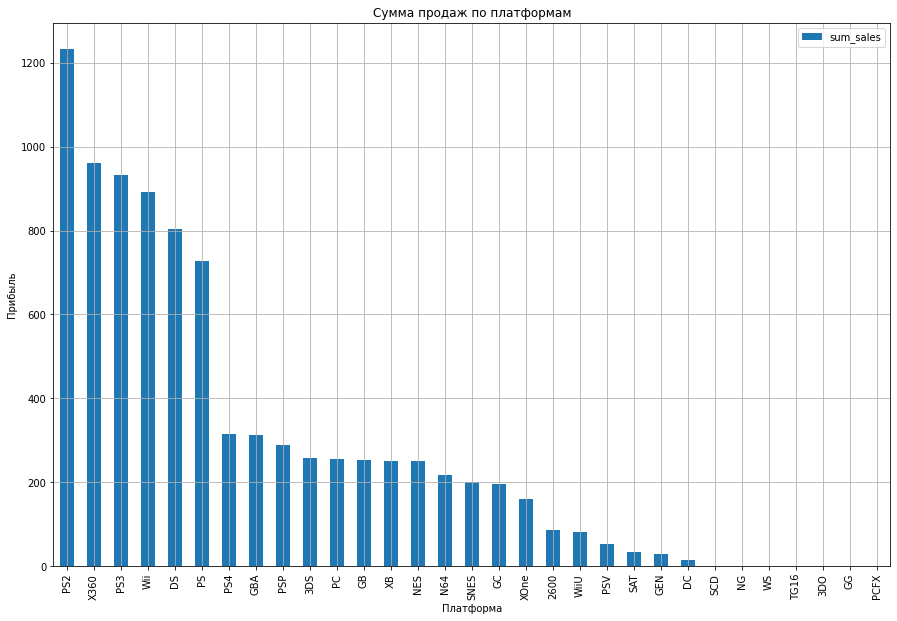

In [19]:
platform_sales.plot(kind='bar', grid=True, figsize=(15, 10), title='Сумма продаж по платформам')
;
plt.xlabel('Платформа');
plt.ylabel('Прибыль');

Определим топ платформ с наибольшими продажами. В моей выборке будет топ-6, т.к. по прибыли наблюдается "пропасть" между PS и PS4, почти в 2 раза.

In [20]:
top6 = data.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending = False).head(6)
display(top6)

,sum_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58


Попробуем автоматизировать построение n-го количества идентичных графиков

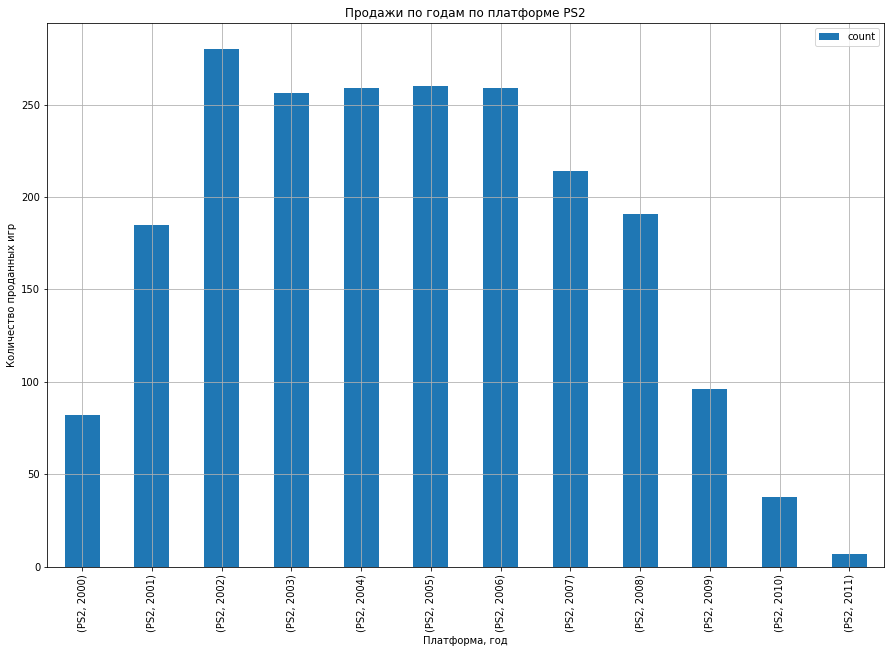

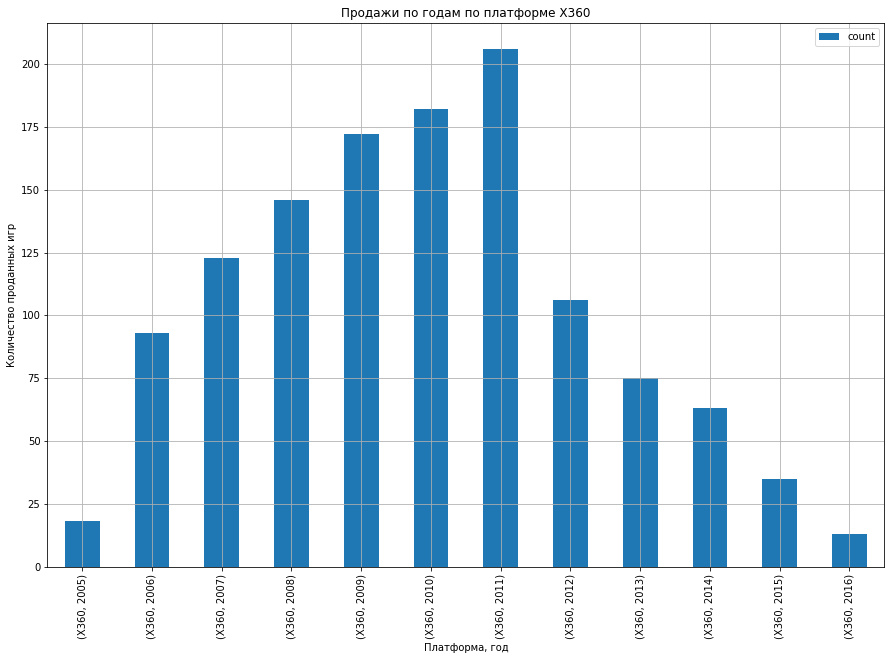

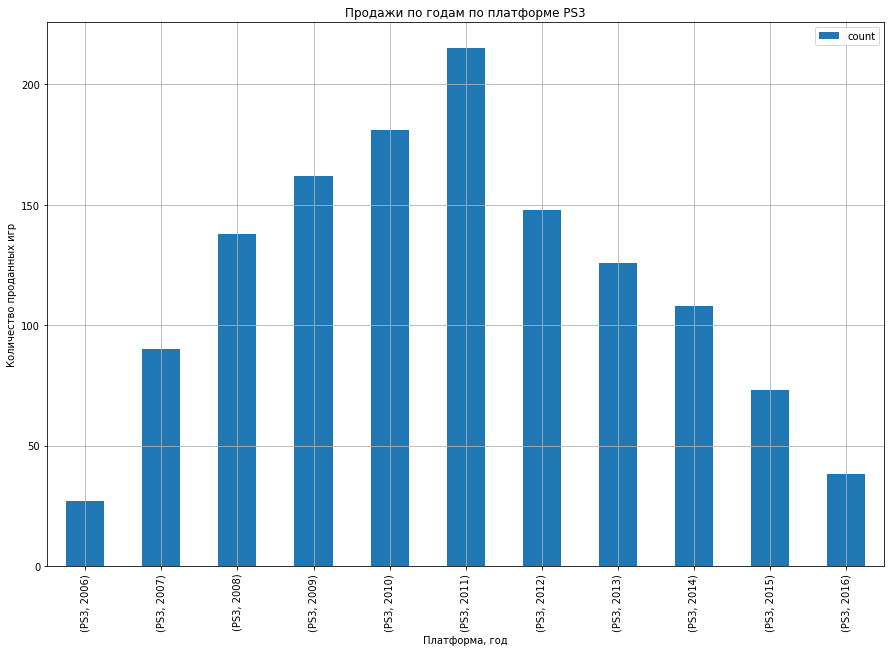

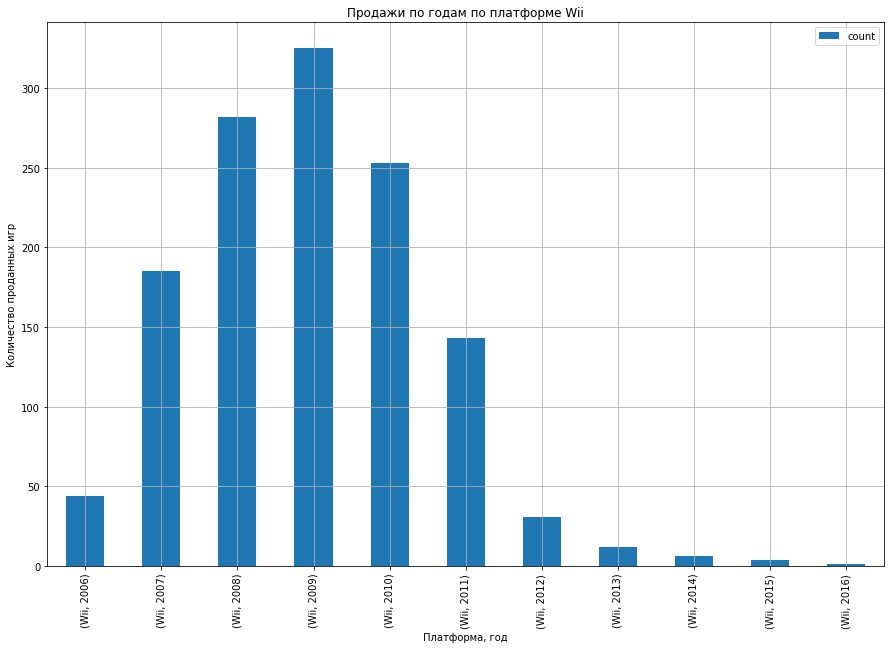

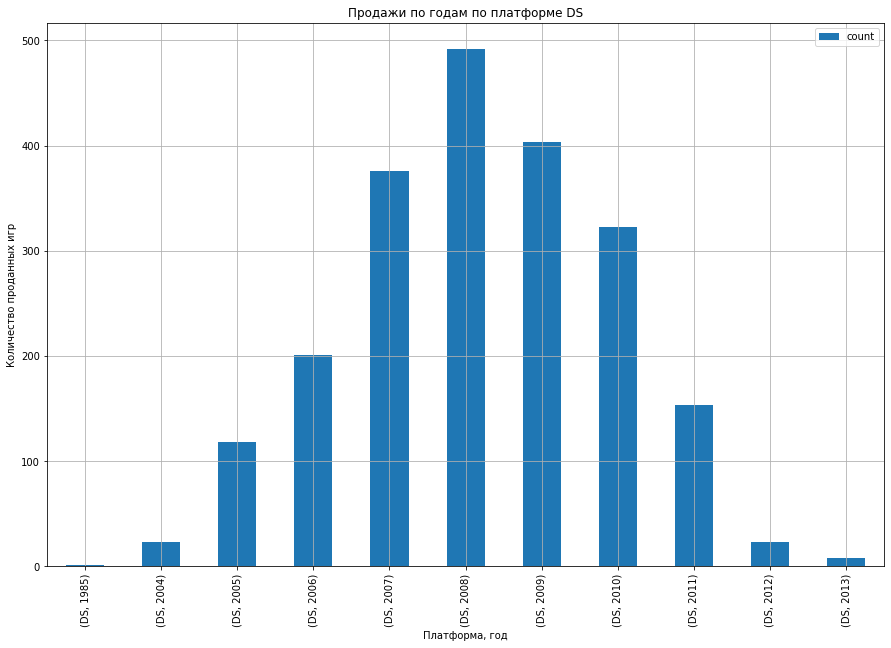

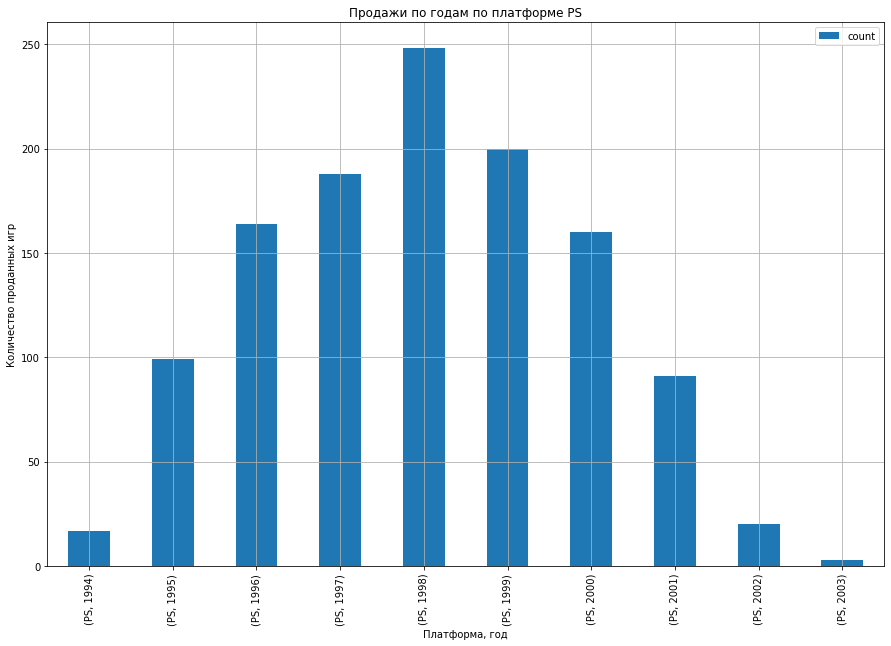

In [21]:
for name_platform in top6.index:   
    data.groupby(['platform', 'year_of_release'])['name'].agg(['count']).query('platform == @name_platform').plot(kind='bar', 
                                                                                                       grid=True, 
                                                                                                       figsize=(15, 10), 
                                                                                                       title=f'Продажи по годам по платформе {name_platform}')  
    plt.xlabel('Платформа, год');
    plt.ylabel('Количество проданных игр');

По графикам можно сделать вывод, что востребованность платформы на рынке компьютерных игр имеет "взлет" и "падение". Т.е. новая платформа какое-то время "раскручивается", а позднее, теряет потребителей из-за выхода более новых решений. В среднем, такой всплеск укладывается в 5 лет.

Рассмотрим продукты, вышедшие с 2014 года и далее. Даже без графиков, использовать что-то более раннее не было бы логичным. Тут и инфляция и другие классы игровых устройств, за более высокую стоимость соответственно. Конечно, бывают как игры, востребованные более чем 20 лет, например, Counter Strike, так и потребители, остающиеся на старой консоли до последнего, но это скорее исключения, чем тенденция.

### 3.3. Определение временного интервала для дальнейшего исследования

In [22]:
games = data.query('year_of_release > 2013')
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unk,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unk,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unk,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,unk,7.55
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,unk,7.39
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


**Посмотрим, какие из платформ были наиболее прибыльнами за выбранный временной интервал:**

In [23]:
games.pivot_table(index = 'platform', values = 'sum_sales', aggfunc= 'sum').sort_values(by = 'sum_sales', ascending = False)

,sum_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


Визуализируем:

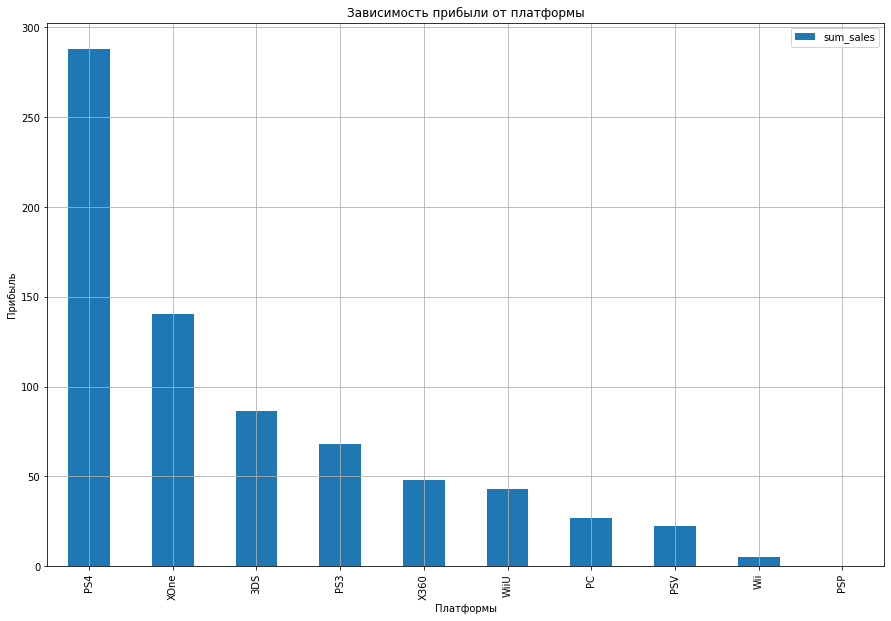

In [24]:
(games    
         .pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values(by = 'sum_sales', ascending = False)
         .plot(kind='bar', grid=True, figsize=(15, 10), title='Зависимость прибыли от платформы')
);
plt.xlabel('Платформы');
plt.ylabel('Прибыль');

В полученном срезе явно "доминирует" PS4 - прибыль самая большая. Уверенное второе место "держит" XOne. Учитывая то, что консоли зачастую выживаются более новыми моделями, перспективными можно считать PS4 и XOne. Скорее всего, они смогут "прибавить" в плане прибыли, тогда как другие платформы будут "падать".

**Изучим прибыль за выбранный временной интервал по каждой из платформ**

Исследование целесообразно провести не на всех платформах, а на топ-5, в котором есть вероятно перспективные платформы. Добавим туда также PC, здравый смысл подсказывает, что существует сегмент консервативных пользователей, которые не видят альтернативы компьютеру, прибыль от них тоже имеет место быть.

In [25]:
top_6 = games.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values(by = 'sum_sales', ascending = False).head(6)
display(top_6)

,sum_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98


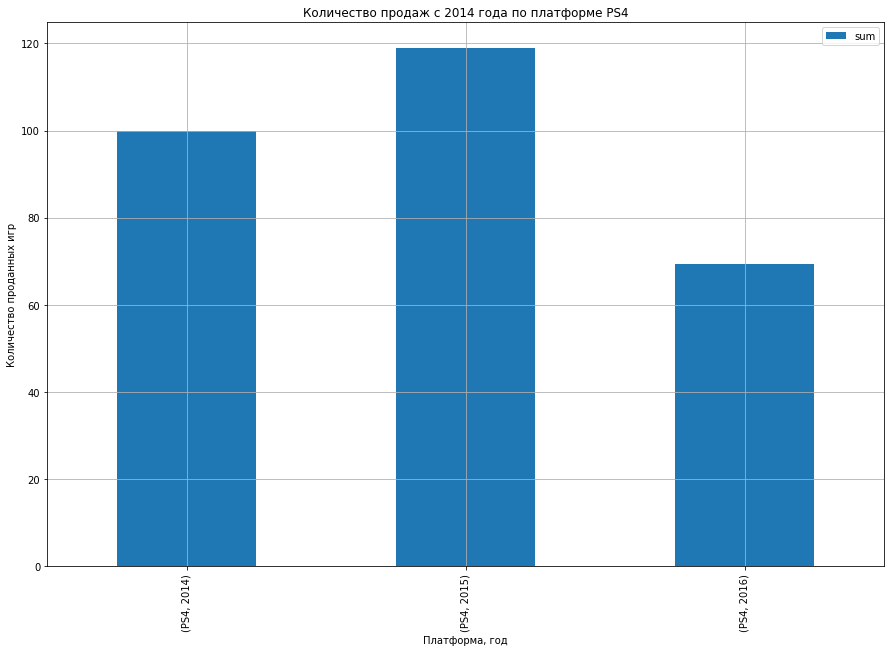

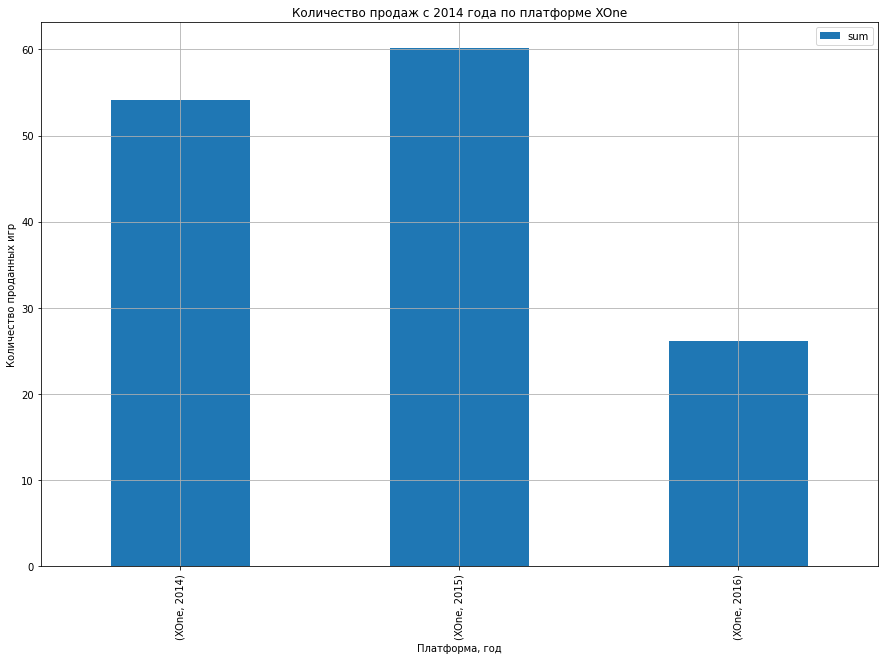

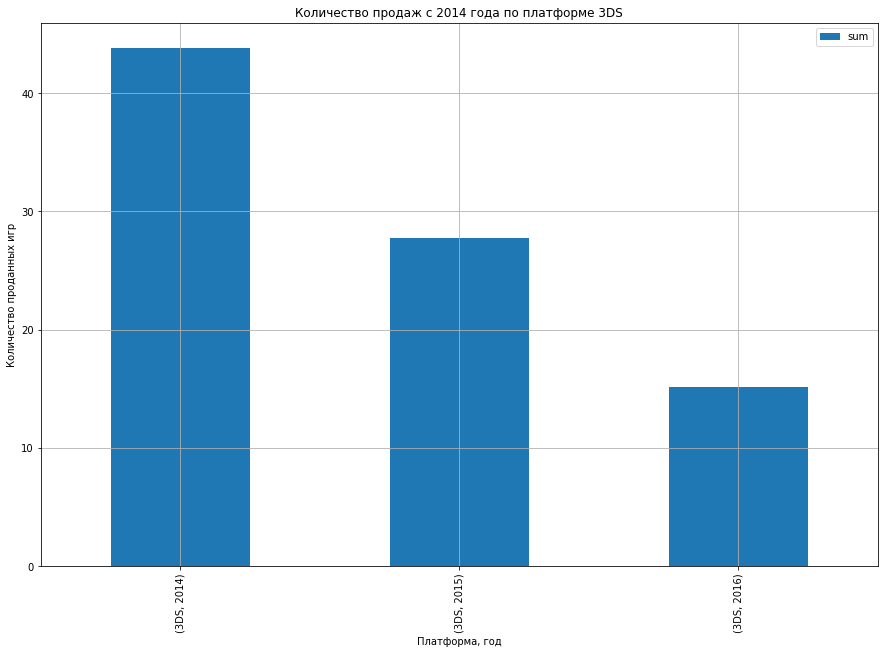

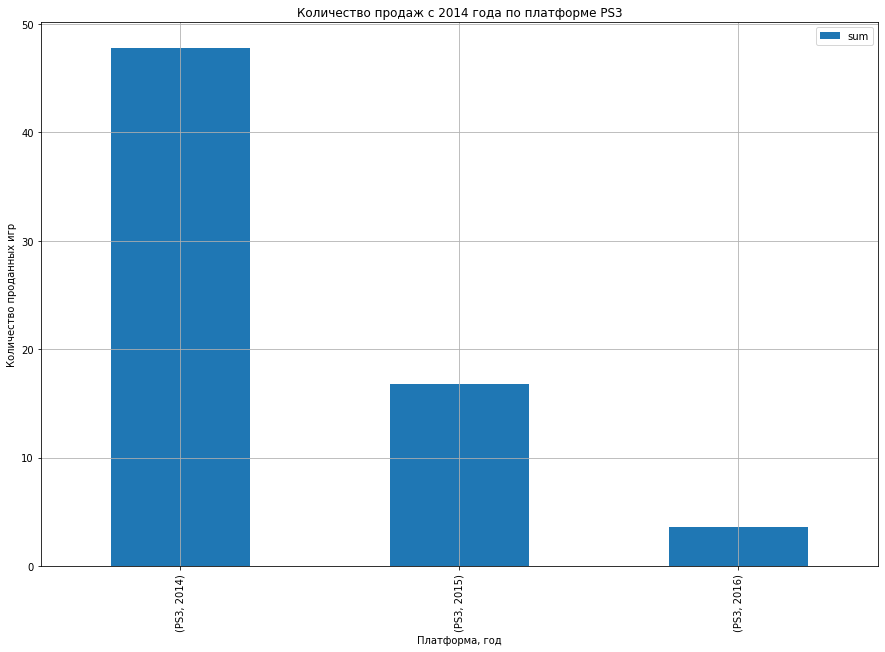

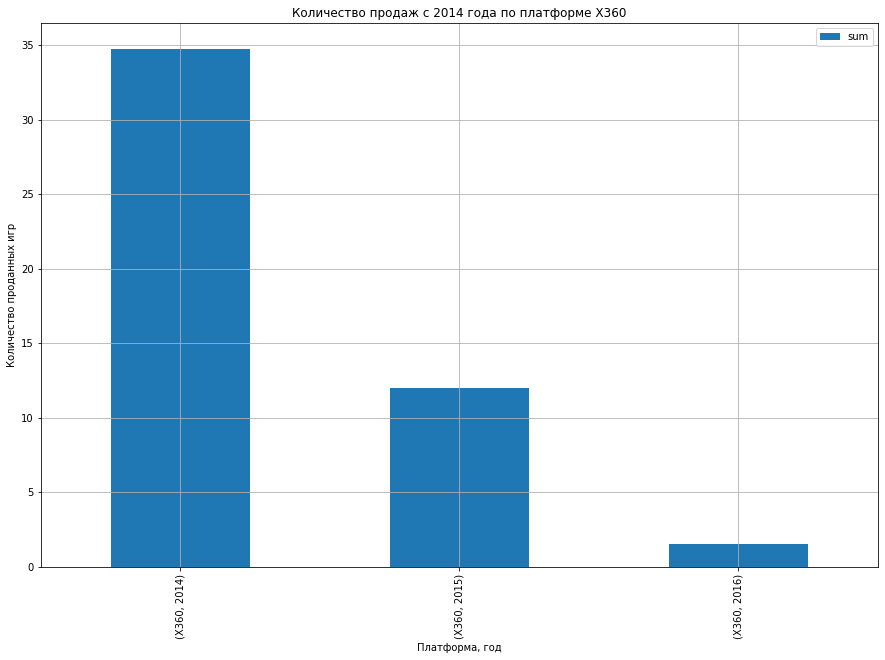

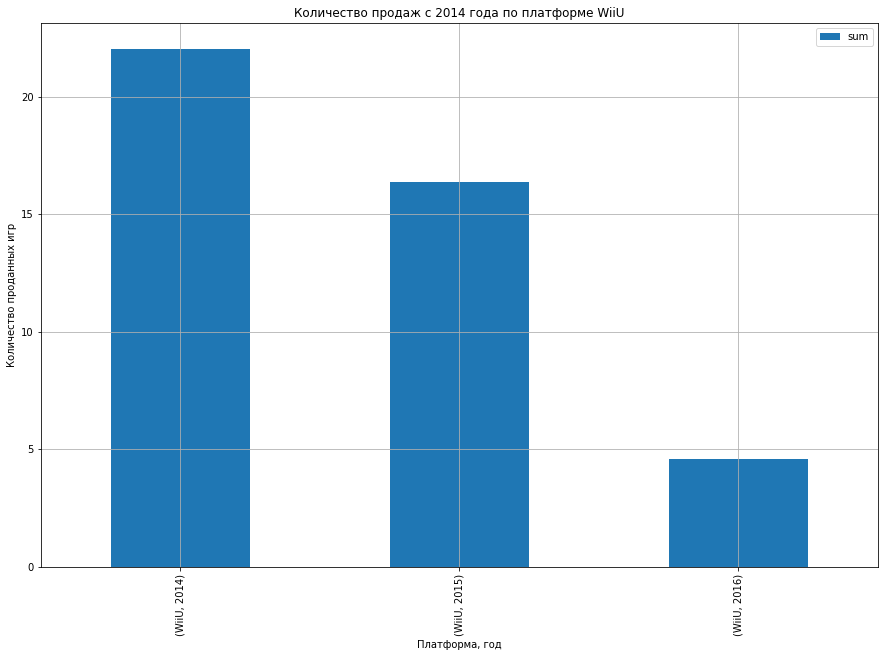

In [26]:
for platform_name in top_6.index:   
    games.groupby(['platform', 'year_of_release'])['sum_sales'].agg(['sum']).query('platform == @platform_name').plot(kind='bar', 
                                                                                                       grid=True, 
                                                                                                       figsize=(15, 10), 
                                                                                                       title=f'Количество продаж с 2014 года по платформе {platform_name}')  
    plt.xlabel('Платформа, год');
    plt.ylabel('Количество проданных игр');

Прежде чем комментировать графики, стоит еще раз вспомнить, что данные за 2016 год неполные. Если немного пофантазировать и оценить графики таким образом, что наблюдается постепенный рост прибыли по новым платформам, а старые платформы теряют клиентов (как это было выявлено ранее) - в лидерах как-раз таки окажутся PS4 и XOne, что подтверждает мое предположение. PC ведет себя относительно стабильно. В 2017 году они могут стать еще более прибыльными, поэтому, считаем их основной перспективой на планируемый год.

### 3.4.**Построение "ящика с усами"**

Перед выполнением этого шага исследования, стоит вспомнить, что в играх, продукты бывают как "вирусными", так и "провальными". Причем как с точки зрения продаж, так и с точки зрения рейтингов. Поэтому, целесообразно рассмотреть только те продукты, которые хотя бы немного, но покупались пользователями. Посмотрим выборку игр, которые купили хотя бы 1 миллион раз.

In [27]:
sold_games = games.query('sum_sales > 1')
display(sold_games)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unk,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unk,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unk,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
2012,The Legend of Zelda: Twilight Princess HD,WiiU,2016,Action,0.56,0.30,0.08,0.09,86.0,8.4,T,1.03
2024,NBA 2K17,XOne,2016,Sports,0.86,0.06,0.00,0.11,90.0,6.2,E,1.03
2050,Assassin's Creed: Rogue,X360,2014,Action,0.58,0.34,0.00,0.09,72.0,7.3,M,1.01
2051,Rayman Legends,PS4,2014,Platform,0.22,0.64,0.00,0.16,90.0,8.5,E10+,1.02


Text(0.5, 0, 'Количество проданных копий, млн')

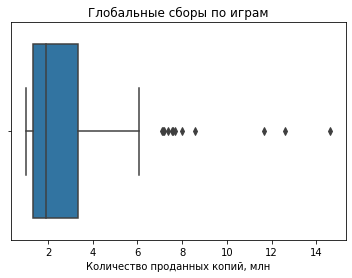

In [28]:
boxplot_sold_games = sns.boxplot('sum_sales', data = sold_games)
boxplot_sold_games.set_title('Глобальные сборы по играм')
boxplot_sold_games.set_xlabel('Количество проданных копий, млн')

(1.0, 15.0)

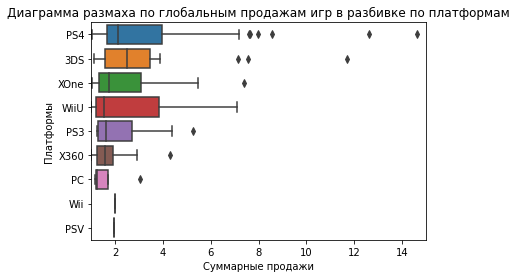

In [29]:
sns.boxplot(data=sold_games, x='sum_sales', y='platform')

plt.title(label='Диаграмма размаха по глобальным продажам игр в разбивке по платформам')
plt.xlabel('Суммарные продажи')
plt.ylabel('Платформы')
plt.xlim(1, 15) #смотрим график от минимального до максимального значения в выборке

Такой график говорит, конечно, о выбросах, но в данном случае это не аномалии, а очень востребованные и прибыльные игры. Подавляющее большинство игр на всех платформах продаются в пределах 1-2 миллиона копий. Количественно, больше всего "крутых" продуктов выходило на PS3, X360, PS4 и 3DS.

Также, посмотрим круговую диаграмму прибыли с платформ за исследуемые годы.

platform
3DS     3.49
PC      1.67
PS3     2.27
PS4     3.20
PSV     1.96
Wii     2.01
WiiU    2.59
X360    1.78
XOne    2.33
Name: sum_sales, dtype: float64

<AxesSubplot:title={'center':'Прибыль с платформ за 2014-2016 г.'}, ylabel='sum_sales'>

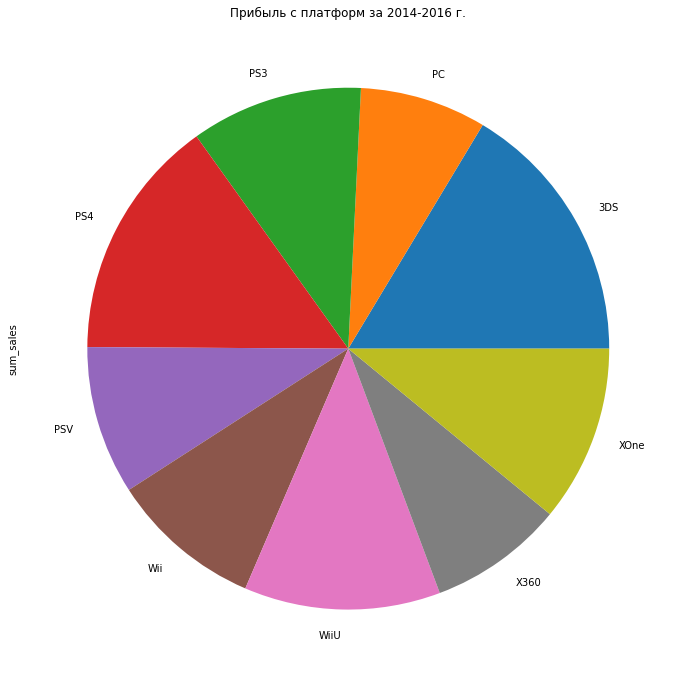

In [30]:
revenue_mean = sold_games.groupby('platform')['sum_sales'].mean().round(2)
display(revenue_mean)
revenue_mean.plot(kind='pie', figsize=(12, 12), title='Прибыль с платформ за 2014-2016 г.')

Выделяются PS4 и 3DS.

### 3.5.**Установим зависимость между отзывами и продажами игр**

Сначала проверим, есть ли зависимость на примере PS4 - по прогнозу она может "сделать кассу" в 2017 году

In [31]:
ps4 = games.query('platform == "PS4"')
ps4.sort_values(by = 'sum_sales', ascending = False).head(10) #смотрим самые прибыльные игры

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unk,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unk,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08
154,Destiny,PS4,2014,Shooter,2.49,2.07,0.16,0.92,76.0,6.1,T,5.64
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39


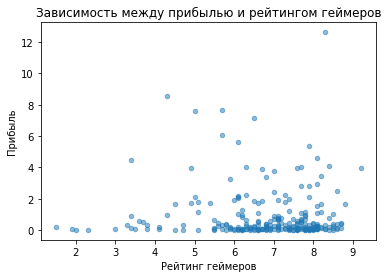

In [32]:
(ps4 
         .plot(x = 'user_score', y = 'sum_sales', kind = 'scatter', alpha = 0.5, 
          title='Зависимость между прибылью и рейтингом геймеров')
);
plt.ylabel('Прибыль');
plt.xlabel('Рейтинг геймеров');

In [33]:
ps4['sum_sales'].corr(ps4['user_score'])

-0.040131589472697356

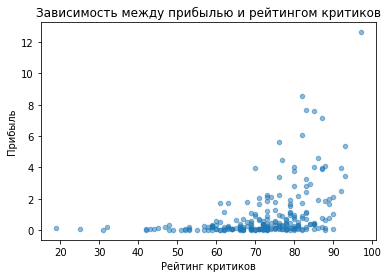

In [34]:
(ps4 
         .plot(x = 'critic_score', y = 'sum_sales', kind = 'scatter', alpha = 0.5, 
          title='Зависимость между прибылью и рейтингом критиков')
);
plt.ylabel('Прибыль');
plt.xlabel('Рейтинг критиков');

In [35]:
ps4['sum_sales'].corr(ps4['critic_score'])

0.40266141068104083

Существует зависимость между рейтингом профессиональных критиков и фактом реализации игр. Игры, которым критики поставили 70+ баллов продаются лучше, а также, видим положительную корреляцию. Соответственно, чем выше оценка критиков - тем лучше игра покупается пользователям.

В свою очередь, зависимость между рейтингом геймеров и успешностью продукта практически отсутствует.

**Справедливо сделать вывод, что оценка критиков на рынке игровой индустрии имеет куда большее влияние.**

**Произведем идентичные расчеты для XOne**

In [36]:
x_one = games.query('platform == "XOne"')
x_one.sort_values(by = 'sum_sales', ascending = False).head(10) #смотрим самые прибыльные игры

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,unk,7.39
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
342,Star Wars Battlefront (2015),XOne,2015,Shooter,2.04,1.28,0.02,0.32,NaN,NaN,unk,3.66
373,Assassin's Creed: Unity,XOne,2014,Action,2.27,0.90,0.00,0.33,72.0,4.1,M,3.50
398,Destiny,XOne,2014,Shooter,2.14,0.92,0.00,0.31,75.0,5.5,T,3.37
413,Gears of War: Ultimate Edition,XOne,2015,Shooter,2.61,0.33,0.00,0.34,82.0,7.5,M,3.28
417,FIFA 16,XOne,2015,Sports,0.89,2.12,0.00,0.24,84.0,4.4,E,3.25


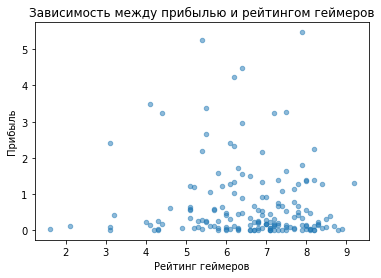

In [37]:
(x_one 
         .plot(x = 'user_score', y = 'sum_sales', kind = 'scatter', alpha = 0.5, 
          title='Зависимость между прибылью и рейтингом геймеров')
);
plt.ylabel('Прибыль');
plt.xlabel('Рейтинг геймеров');

In [38]:
x_one['sum_sales'].corr(x_one['user_score'])

-0.0703839280647581

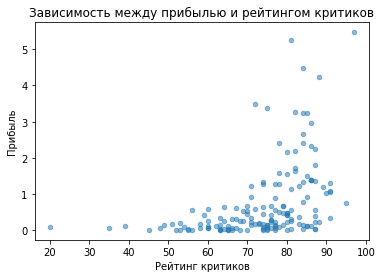

In [39]:
(x_one 
         .plot(x = 'critic_score', y = 'sum_sales', kind = 'scatter', alpha = 0.5, 
          title='Зависимость между прибылью и рейтингом критиков')
);
plt.ylabel('Прибыль');
plt.xlabel('Рейтинг критиков');

In [40]:
x_one['sum_sales'].corr(x_one['critic_score'])

0.42867694370333226

**Выводы полностью аналогичны сделанным при расчетах связи оценки и реализации игр на PS4**

**Посмотрим зависимость для всех платформ (не только тех, которые ранее были условно классифицированы, как топовые):**

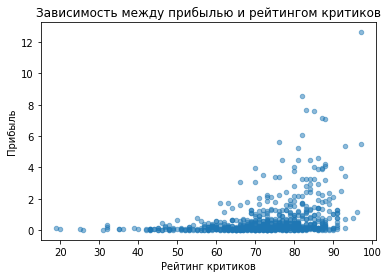

In [41]:
(games 
         .plot(x = 'critic_score', y = 'sum_sales', kind = 'scatter', alpha = 0.5, 
          title='Зависимость между прибылью и рейтингом критиков')
);
plt.ylabel('Прибыль');
plt.xlabel('Рейтинг критиков');

In [42]:
games['sum_sales'].corr(games['critic_score'])

0.328105086966363

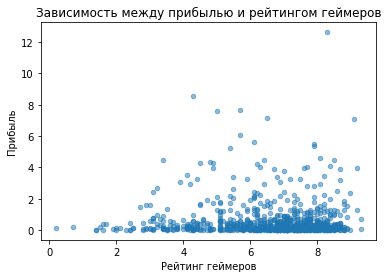

In [43]:
(games 
         .plot(x = 'user_score', y = 'sum_sales', kind = 'scatter', alpha = 0.5, 
          title='Зависимость между прибылью и рейтингом геймеров')
);
plt.ylabel('Прибыль');
plt.xlabel('Рейтинг геймеров');

In [44]:
games['sum_sales'].corr(games['user_score'])

-0.013070305002484585

**Можно констатировать следующее: как и в случае перспективных платформ, критики и их оценки способны влиять на факт "успешности" реализации игры.**

**По оценкам геймеров зависимость также, практически отсутствует.**

### 3.6. Какие жанры востребованы геймерами?

**Посмотрим, какие жанры наиболее востребованы среди геймеров:**

In [45]:
top_genre = data.pivot_table(index='genre', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False).head(10)
display(top_genre)

,sum_sales
genre,
Action,1716.52
Sports,1309.67
Shooter,1041.36
Role-Playing,931.08
Platform,825.55
Misc,790.29
Racing,723.49
Fighting,442.66
Simulation,387.96


Для наглядности, обратимся к графику

<AxesSubplot:ylabel='genre'>

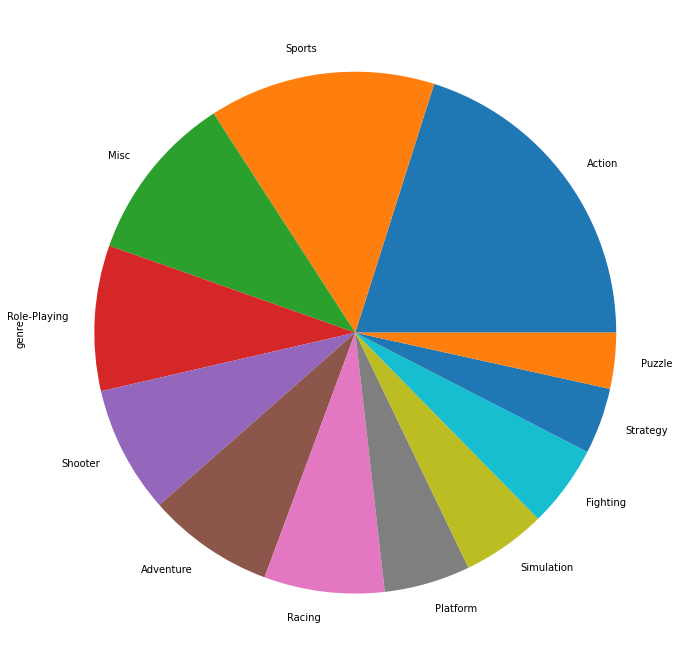

In [46]:
data['genre'].value_counts().plot(kind='pie', figsize=(12, 12), legend=False)

Тройка самых популярных жанров: Action, Sports, Shooter. Меньше всего нравятся симуляторы и паззлы.

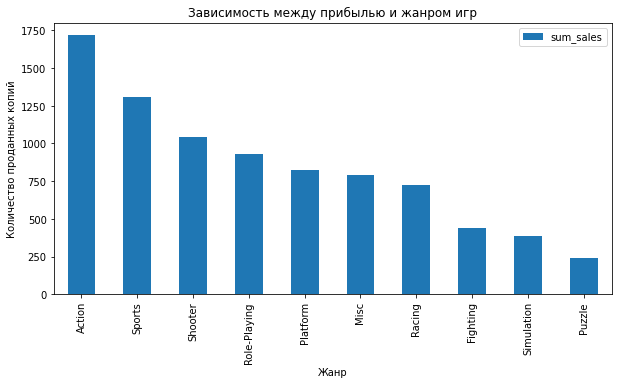

In [47]:
top_genre.plot(y='sum_sales', kind='bar', figsize=(10, 5), title='Зависимость между прибылью и жанром игр')

plt.ylabel('Количество проданных копий');
plt.xlabel('Жанр');

График выглядит вполне предсказуемо: логично, что если экшн наиболее часто покупается, прибыль от него тоже будет значительно выше чем от других жанров.

### 3.7. Вывод

- Индустрия компьютерных игр начала расти с 1995 года и достигла своего пика в 2008-2009 годах
- "Цикл жизни" каждой платформы, впервые выходящей на рынок составляет ~ 5 лет
- С 2014 года пользователи наиболее активно приобретали игры для следующих платформ: PS4, 3DS
- Перспективными можно считать платформы PS4, XOne
- Критики и их оценки способны влиять на продажу продукта
- Пользовательские оценки не влияют на реализацию игр
- Тройка наиболее часто приобретаемых и, соответственно, прибыльных жанров: Action, Sports, Shooter

# Шаг 4. Составление портрета пользователя каждого региона

**Примерный план выполнения шага:**
- Сформировать "портрет" геймеров из каждого сегмента рынка: Северная Америка, Европа, Япония, другие страны
- Установить, что общего между полученными портретами и каковы различия между потребителями из разных стран

## 4.1. **Портрет геймеров в Северной Америке**

**Определим топ-5 продаваемых платформ по сегменту Северная Америка (NA)**

In [48]:
na_top5_platform = games.pivot_table(index='platform', values='na_sales', aggfunc='sum').reset_index().sort_values(by = 'na_sales', ascending = False).head()
display(na_top5_platform)

,platform,na_sales
3,PS4,98.61
9,XOne,81.27
8,X360,28.30
0,3DS,22.64
2,PS3,22.05


In [49]:
na_top5_genre = games.pivot_table(index='genre', values='na_sales', aggfunc='sum').reset_index().sort_values(by = 'na_sales', ascending = False).head()
display(na_top5_genre)

,genre,na_sales
8,Shooter,79.02
0,Action,72.53
10,Sports,46.13
7,Role-Playing,33.47
3,Misc,15.05


In [50]:
rating_na = games.groupby('rating')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False).head()
display(rating_na)

,rating,na_sales
2,M,96.42
4,unk,64.72
0,E,50.74
3,T,38.95
1,E10+,33.23


**Описание рынка игр в Северной Америке**
- В Северной Америке рынок игр "захватил" PS4, но XOne, пусть и отстает, но не многократно
- Тройка жанров аналогична результату исследования на прошлом этапе: Action, Shooter, Sports
- Наибольшую прибыль приносят продажи игр с рейтингом М. На втором месте - неизвестный рейтинг. Тут следует вспомнить, что на стадии предобработки было решено, что это не только пропуски, в смысле проблемы с данными, но и TBD - где рейтинг не определен. Судя по всему, есть сегмент пользователей, которым непринципиально во что играть.

## 4.2. **Портрет геймеров в Европе**

In [51]:
eu_top5_platform = games.pivot_table(index='platform', values='eu_sales', aggfunc='sum').reset_index().sort_values(by = 'eu_sales', ascending = False).head()
display(eu_top5_platform)

,platform,eu_sales
3,PS4,130.04
9,XOne,46.25
2,PS3,25.54
1,PC,17.97
0,3DS,16.12


In [52]:
eu_top5_genre = games.pivot_table(index='genre', values='eu_sales', aggfunc='sum').reset_index().sort_values(by = 'eu_sales', ascending = False).head()
display(eu_top5_genre)

,genre,eu_sales
0,Action,74.68
8,Shooter,65.52
10,Sports,45.73
7,Role-Playing,28.17
6,Racing,14.13


In [53]:
rating_eu = games.groupby('rating')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False).head()
display(rating_eu)

,rating,eu_sales
2,M,93.44
4,unk,58.95
0,E,58.06
3,T,34.07
1,E10+,26.16


**Описание рынка игр в Европе**
- Европейцы более "жалуют" PS4 - приобретают продукты для этой консоли более чем в 2,5 раза чаще, чем на XOne
- Тройка жанров аналогична результату исследования на прошлом этапе (как в Северной Америке): Action, Shooter, Sports
- Наибольшую прибыль приносят продажи игр с рейтингом М, аналогично

## 4.3. **Портрет геймеров в Японии**

In [54]:
jp_top5_platform = games.pivot_table(index='platform', values='jp_sales', aggfunc='sum').reset_index().sort_values(by = 'jp_sales', ascending = False).head()
display(jp_top5_platform)

,platform,jp_sales
0,3DS,44.24
3,PS4,15.02
5,PSV,14.54
2,PS3,11.22
7,WiiU,7.31


In [55]:
jp_top5_genre = games.pivot_table(index='genre', values='jp_sales', aggfunc='sum').reset_index().sort_values(by = 'jp_sales', ascending = False).head()
display(jp_top5_genre)

,genre,jp_sales
7,Role-Playing,31.16
0,Action,29.58
2,Fighting,6.37
3,Misc,5.61
8,Shooter,4.87


In [56]:
rating_jp = games.groupby('rating')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False).head()
display(rating_jp)

,rating,jp_sales
4,unk,56.90
3,T,14.78
0,E,8.94
2,M,8.01
1,E10+,4.46


**Описание рынка игр в Японии**
- Японцам значительно больше нравится 3DS, продается в 2 раза чаще, чем PS4
- Тройка жанров совсем другая, преобладают "спокойные" жанры, но Action тоже есть, вот только востребован он куда меньше, чем в других сегментах
- Наибольшую прибыль приносят продажи игр с неизвестным в рамках данного исследования рейтингом. Видимо, для японцев факт возрастного ограничения менее критичен. Наиболее продаваемый в Америке и Европе М лишь четвертый.

## 4.4. **Портрет геймеров в других странах**

In [57]:
other_top5_platform = games.pivot_table(index='platform', values='other_sales', aggfunc='sum').reset_index().sort_values(by = 'other_sales', ascending = False).head()
display(other_top5_platform)

,platform,other_sales
3,PS4,44.48
9,XOne,12.52
2,PS3,9.37
8,X360,4.35
0,3DS,3.68


In [58]:
other_top5_genre = games.pivot_table(index='genre', values='other_sales', aggfunc='sum').reset_index().sort_values(by = 'other_sales', ascending = False).head()
display(other_top5_genre)

,genre,other_sales
0,Action,22.57
8,Shooter,21.53
10,Sports,14.36
7,Role-Playing,8.64
3,Misc,4.03


In [59]:
rating_other = games.groupby('rating')['other_sales'].sum().reset_index().sort_values(by='other_sales', ascending=False).head()
display(rating_other)

,rating,other_sales
2,M,28.67
4,unk,18.40
0,E,15.39
3,T,11.33
1,E10+,7.83


Картина по другим странам идентична данным по Европе и не особо отличается от американской. Выделяется только Япония

## 4.5. Вывод

- В целом, положение вещей на всех рассмотренных сегментах рынка идентично, за исключением Японии
- В Америке и Европе одинаково востребованы жанры: Action, Shooter, Sports
- Наиболее часто, люди приобретают продукты на PS4 и XOne
- Наиболее часто приобретаются игры с рейтингом М, за исключением Японии
- Рынок Японии сильно отличается от других сегментов: там преобладают продажи игр для платформы 3DS, а самый распространенный жанр - ролевые игры. Рейтинг тоже выделяется, чаще всего покупают игры, без учета рейтинга, а также рейтинг Т.

# Шаг 5. Проверка гипотез

**Примерный план выполнения шага:**
- Одназначно трактовать гипотезы (что считается нулевой, а что альтернативной)
- Создать выборки для проверки гипотез
- Рассчитать статисческие параметры
- Осуществить t-test
- Описать выводы, верна ли гипотеза

## 5.1. **Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Перед проверкой гипотез необходимо одназначно трактовать нулевую и альтернативную гипотезы:

- За нулевую гипотезу примем, что средние рейтинги по двум требуемым платформам равны
- За альтернативную гипотезу примем, что рейтинги не равны, вне зависимости от того, рейтинги какой платформы будет как выше, так и ниже относительно друг друга.

Для расчета создадим 2 среза, по каждой интересующей платформе соответственно.

In [60]:
xone = games.query('platform == "XOne"').dropna()
pc = games.query('platform == "PC"').dropna()

**Посчитаем дисперсию:**

In [61]:
np.var(xone['user_score'], ddof=1)

1.7393757174392939

In [62]:
np.var(pc['user_score'], ddof=1)

2.75648817696415

**Посчитаем стандартное отклонение:**

In [63]:
np.std(xone['user_score'], ddof=1)

1.3188539409044862

In [64]:
np.std(pc['user_score'], ddof=1)

1.660267501628623

**С помощью t-тест'а проверим гипотезу. Также, чтобы убедиться в правильности вывода, вместе с констатацией факта о достоверности гипотезы выведем на экран сравнение средних пользовательских рейтингов по интересующим платформам:**

In [65]:
alpha = 0.05 

results = st.ttest_ind(
    xone['user_score'], 
    pc['user_score'], equal_var = False)

print('p-значение: ', results.pvalue)  

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print()
print('Средний рейтинг пользователей игр на платформе XOne',xone['user_score'].mean().round(2))
print('Средний рейтинг пользователей игр на PC',pc['user_score'].mean().round(2))

p-значение:  0.1403785186826978
Не получилось отвергнуть нулевую гипотезу

Средний рейтинг пользователей игр на платформе XOne 6.62
Средний рейтинг пользователей игр на PC 6.34


Нулевая гипотеза **достоверна и не может быть отвергнута**. Об этом говорит и t-тест и сравнение рейтингов. Можно сказать, что пользовательские рейтинги равны.

## 5.2.**Гипотеза 2. Средние пользовательские рейтинги жанров Action и Sports разные.**

- За нулевую гипотезу примем, что средние рейтинги по двум жанрам равны
- За альтернативную гипотезу примем, что рейтинги не равны, вне зависимости от того, рейтинги какого жанра будут как выше, так и ниже относительно друг друга.

In [66]:
action = games.query('genre == "Action"').dropna()
sports = games.query('genre == "Sports"').dropna()

In [67]:
np.var(action['user_score'], ddof=1)

1.8065432146894858

In [68]:
np.var(sports['user_score'], ddof=1)

2.2310931531002054

In [69]:
np.std(action['user_score'], ddof=1)

1.3440770865874792

In [70]:
np.std(sports['user_score'], ddof=1)

1.493684422192387

In [71]:
alpha = 0.05 

results = st.ttest_ind(
    action['user_score'], 
    sports['user_score'], equal_var = False)

print('p-значение: ', results.pvalue)  

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print()
print('Средний рейтинг игр в жанре Action по мнению пользователей', action['user_score'].mean().round(2))
print('Средний рейтинг игр в жанре Sport по мнению пользователей', sports['user_score'].mean().round(2))

p-значение:  8.327612976032047e-09
Отвергаем нулевую гипотезу

Средний рейтинг игр в жанре Action по мнению пользователей 6.83
Средний рейтинг игр в жанре Sport по мнению пользователей 5.68


Результат t-тест'а говорит о том, что рейтинги двух жанров разные. Они не различаются, условно, в 2 раза, но разница есть и  весомая. Имеем право сказать, что **верна альтернативная гипотеза**, т.е. предположение, что рейтинги для двух жанров не равны **было верным**.

## 5.3. Вывод

Были проверены 2 гипотезы и обе оказались верными:

- Рейтинги, которые выставили пользователи платформ PC и XOne можно считать одинаковыми
- Между пользовательскими рейтингами игр по жанрам Action и Sport есть разница. Игры жанра Action пользователям нравятся больше

# Шаг 6. Общий вывод

**В ходе исследования были констатированы следующие факты:**

- Платформы наиболее востребованы в течение ~5 лет с момент появления их на рынке игр
- С 2014 года пользователи наиболее активно приобретали игры для следующих платформ: PS4 и XOne
- Оценка игр профессиональными критиками влияет на количество их продаж, но это явно не основной фактор успеха/провала продукта
- Пользовательские оценки (при анализе всей индустрии игр) не влияют на коммерческий успех игр
- Тройка наиболее часто приобретаемых и, соответственно, прибыльных жанров: Action, Sports, Shooter
- Портрет потребителя Европы, Северной Америки и других стран почти идентичен
- Портрет потребителя из Японии очень сильно отличается от геймеров других стран
- Пользователи платформ PC и XOne выставляют играм примерно одинаковые оценки
- Игры жанра Action пользователям нравятся больше, рейтинг выше, по сравнению с жанром Sports

**Резюмируя:**

- Интернет-магазину "Стримчик" следует обратить внимание на платформы PS4 и XOne, они способны принести весомую выручку в прогнозируемом году. Причем, стоит взять на реализацию как сами приставки, так и игры для них.
- В свою очередь, не стоит отказываться от реализации товаров по другим направлениям, например PS3, т.к. спрос на них также будет сохраняться в 2017 году.
- Применительно к играм стоит сделать основной упор на закупку и распространение игр по трем наиболее популярным жанрам. Однако, рекомендация не означает, что не стоит закупать игры строго из тройки самых популярных жанров. Если потребитель придет покупать условный пазл, а магазин приобрел только вышеупомянутые жанры - это будет прямой потерей прибыли
- В случае расширения рынка (и/или при переходе на целевую аудиторию другой страны) следует оценить портрет потребителя и корректировать пропорции реализуемой продукции. Если "Стримчик" решит продавать товары, условно, в Японии - ориентир на портрет европейца будет нерентабельным.

### Спасибо за внимание!